# <font color= #79b0e9> **Examen Parcial 3** </font> 

Sofía Maldonado García

Viviana Toledo De la Fuente

Iván Morales

"Y aquí iría le 4to integrante, si tuviéramos une"

In [59]:
# Librerías Generales
import numpy as np
import pandas as pd

# Gráficas
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns

# Modelado
from sklearn.svm import SVC

# Métricas
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, ConfusionMatrixDisplay

# Tratamiento de Datos
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import RFE
from scipy.stats import boxcox

---

# <font color= #79b0e9> **Análisis Exploratorio de Datos** </font> 

In [60]:
df = pd.read_csv('data/train_data.csv')
print(f' Tamaño del dataset: {df.shape}')
df.head()

 Tamaño del dataset: (119, 10)


,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,Male,272,68,188,82,124,Non-smoker,No,High
1,29,Female,275,68,183,84,129,Non-smoker,No,High
2,50,Male,268,55,189,111,119,Non-smoker,No,High
3,78,Female,194,50,120,94,113,Non-smoker,No,High
4,63,Male,229,35,182,214,160,Smoker,Yes,High


Contamos con un dataset de 119 observaciones, 9 features y 1 target. 

El dataset contiene información relacionada con pacientes y la predisposición que tienen de sufrir un padecimiento en específico, basado en las características biométricas y comorbilidades de cada une.

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Age       119 non-null    int64 
 1   Sex       119 non-null    object
 2   TCh       119 non-null    int64 
 3   HCh       119 non-null    int64 
 4   LCh       119 non-null    int64 
 5   Tr        119 non-null    int64 
 6   BPS       119 non-null    int64 
 7   Sm        119 non-null    object
 8   Diabetes  119 non-null    object
 9   Pred      119 non-null    object
dtypes: int64(6), object(4)
memory usage: 9.4+ KB


Tenemos 6 features numéricas y 3 features categóricas (sex, smoking y diabetes). Tendremos que codificar estas variables para tomarlas en cuenta en nuestro modelo.

Además, no contamos con valores nulos.

## <font color= #4783bf> Variables Cualitativas </font>

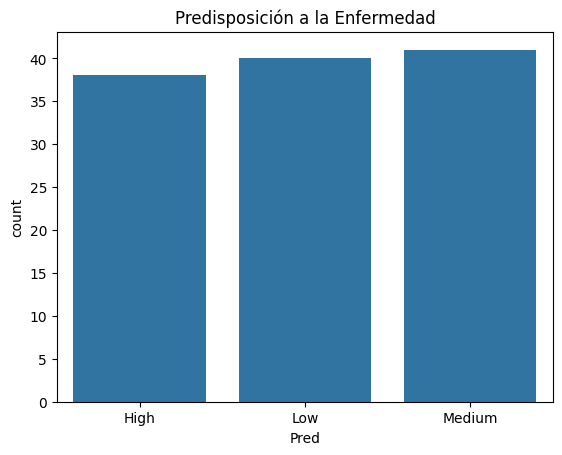

In [62]:
sns.countplot(x='Pred', data=df)
plt.title('Predisposición a la Enfermedad')
plt.show()

Nuestras clases no presentan un desbalanceo severo, lo que es deseable para predecir los tres niveles.

{'Male': 60, 'Female': 59}


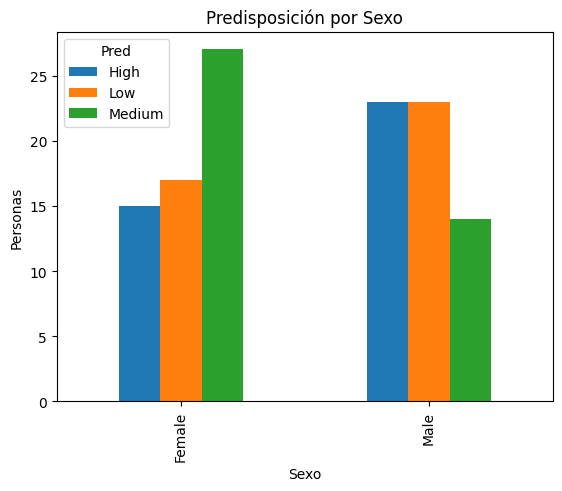

In [63]:
# Función para graficar variables cualitativas
def grafica_cualitativa(var, var_name):
    pd.crosstab(var, df.Pred).plot(kind='bar')
    # Estética
    plt.title(f'Predisposición por {var_name}')
    plt.xlabel(f'{var_name}')
    plt.ylabel('Personas')
    print(var.value_counts().to_dict())

grafica_cualitativa(df.Sex, 'Sexo')

Las categorías de Hombre y Mujer también están balanceadas. Además, observamos que en base a la muestra, las mujeres en su mayoría tienen una predisposición media a la enfermedad, mientras que los hombres están un poco más polarizados, pues tienen la misma probabilidad de tener una predisposición baja o alta.

{'No': 112, 'Yes': 7}


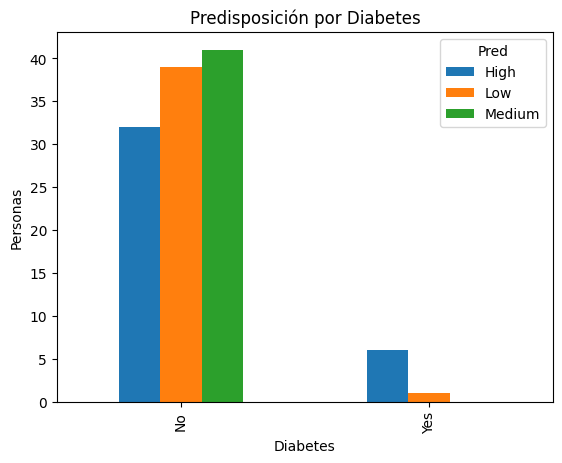

In [64]:
grafica_cualitativa(df.Diabetes, 'Diabetes')

No tener diabetes no parece tener mucho efecto en la predisposición a desarrollar el padecimiento. Sin embargo, es muy probable que personas con diabetes padezcan la enfermedad.

{'Non-smoker': 106, 'Smoker': 13}


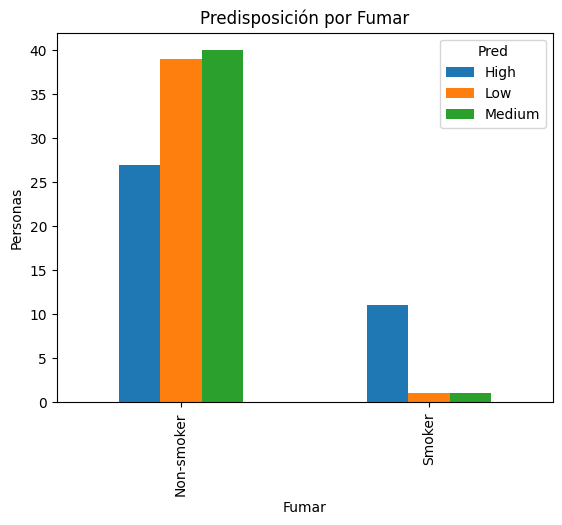

In [65]:
grafica_cualitativa(df.Sm, 'Fumar')

De nuevo, las personas que no fuman tienen prediposiciones mixtas de padecer la enfermedad. Pero es MUY probable que les fumadores desarrollen el padecimiento.

## <font color= #4783bf> Variables Cuantitativas </font>

In [66]:
df.describe()

,Age,TCh,HCh,LCh,Tr,BPS
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,53.369748,224.546218,57.739496,147.260504,132.126050,129.823529
std,16.096039,37.481464,11.393919,39.228462,60.799553,14.550116
min,25.000000,160.000000,31.000000,67.000000,80.000000,111.000000
25%,41.000000,188.000000,50.500000,115.000000,83.500000,119.000000
50%,55.000000,227.000000,62.000000,150.000000,111.000000,127.000000
75%,68.500000,259.500000,68.000000,181.000000,159.000000,138.000000
max,79.000000,277.000000,69.000000,220.000000,298.000000,168.000000


Las variables numéricas tienen escalas algo diferentes, si bien no tan excesivas. 

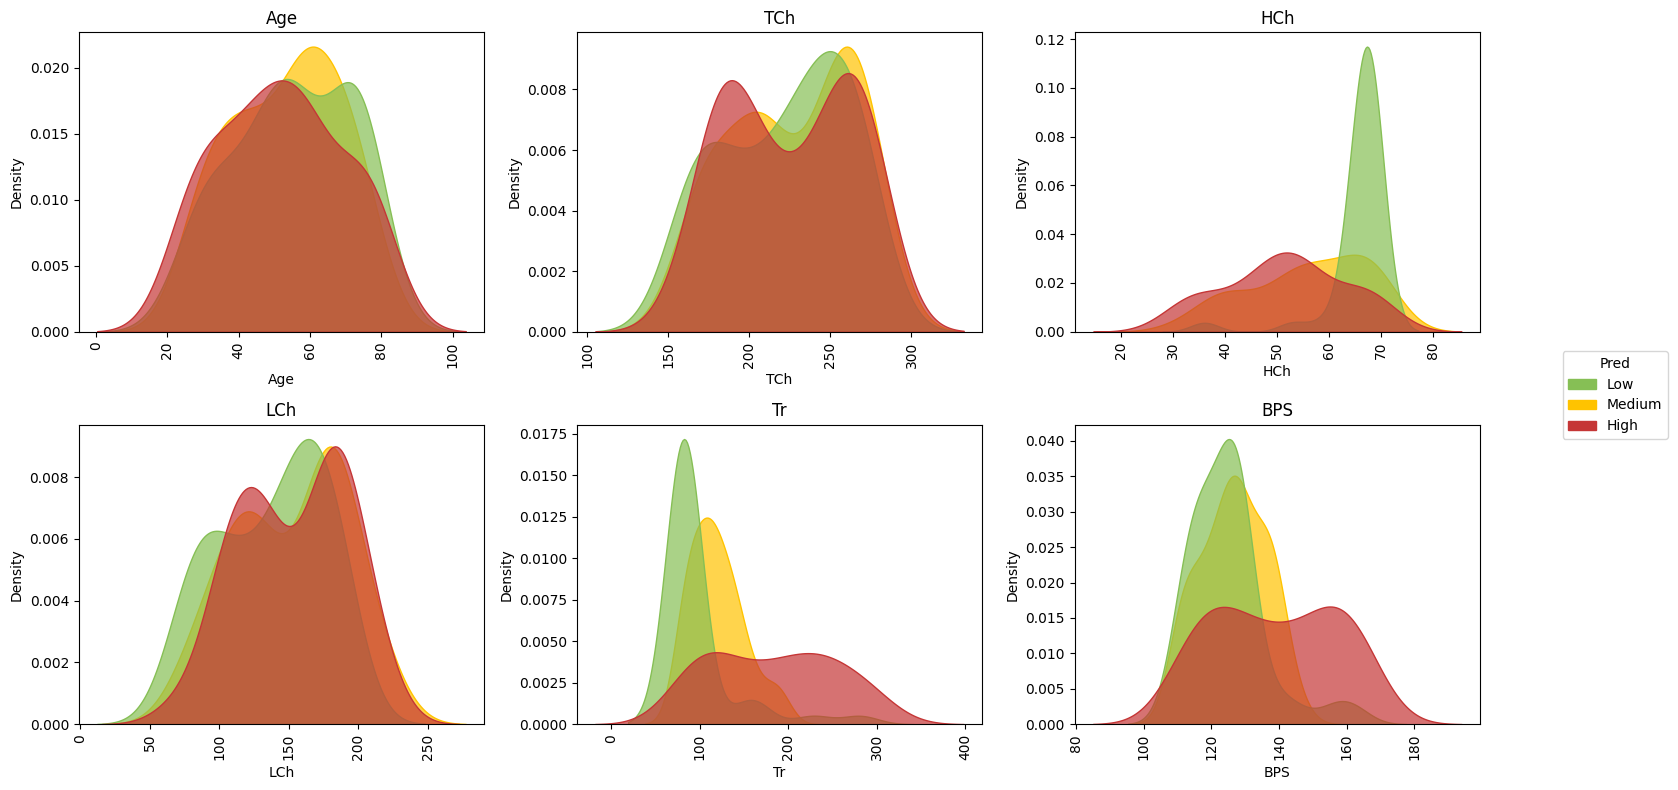

In [67]:
# Filtrar variables numéricas
numeric_vars = df.select_dtypes(include='number').columns.tolist()

# Crear grid 2x3
fig, axes = plt.subplots(2, 3, figsize=(15, 8))
axes = axes.flatten()

# Paleta de colores
palette = {'Low': '#86bf55', 'Medium': '#ffc300', 'High': '#c53636'}

# Gráficos
for i, var in enumerate(numeric_vars):
    ax = axes[i]
    sns.kdeplot(data=df, x=var, hue='Pred', fill=True, common_norm=False, alpha=0.7, ax=ax, palette=palette)
    ax.set_title(var)
    ax.tick_params(axis='x', rotation=90)
    ax.get_legend().remove()

# Leyenda
legend_patches = [Patch(color=color, label=label) for label, color in palette.items()]
fig.legend(handles=legend_patches, title='Pred', loc='center right', bbox_to_anchor=(1.12, 0.5))

plt.tight_layout()
plt.show()

Haciendo gráficas KDE para todas las variables numéricas con respecto a nuestras clases, podemos observar que la Edad, TCh y LCh no son variables con mucho poder predictivo. Sin embargo, las demás variables sí nos aportan discriminantes significativos para las clases.

- TCh: Si cuentan con altos valores de esta variable, es probable que las personas tengan una baja predisposición a la enfermedad.

- Tr: Los valores bajos de esta variable indican una probabilidad media-baja de padecer la enfermedad.

- BPS: A partir de los 100-130 existe una probabilidad baja o media de contraer la enfermedad. Conforme aumenta este nivel, baja la probabilidad de no ser afectade.

<Axes: >

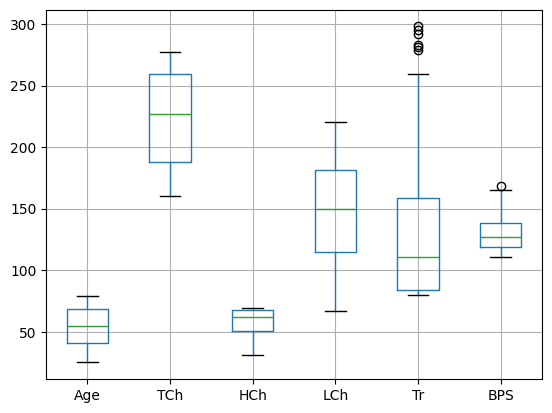

In [70]:
df.select_dtypes(include='number').boxplot()

La variable Tr presenta bastantes outliers, los cuales pueden ser algo problemáticos.

In [72]:
numeric = df.select_dtypes(include='number')

# Calculo de la asimetria con pandas
skewness = round(numeric.skew(),2)
skewness = skewness.to_frame()
skewness = skewness.rename(columns={0: "value"}) 

def f(x):
    if x['value'] < -1 or x['value'] > 1: return 'Highly Skewed'
    elif (x['value']<=0 and x['value']>=-0.5) or (x['value'] >=0 and x['value']<=0.5):
        return 'Symmetric distribution'
    else: return 'Moderately skewed'
    
skewness['skewness'] = skewness.apply(f, axis=1)

skewness

,value,skewness
Age,-0.12,Symmetric distribution
TCh,-0.19,Symmetric distribution
HCh,-0.82,Moderately skewed
LCh,-0.21,Symmetric distribution
Tr,1.23,Highly Skewed
BPS,0.87,Moderately skewed


Debido a la presencia de outliers en Tr, aquella distribución está muy sesgada a la derecha. BPS y HCh están moderadamente sesgadas, a la derecha e izquierda, respectivamente. Lo anterior sugiere que, según el modelo, una transformación de datos no vendría mal. 

## <font color= #4783bf> Codificación de Variables </font>

Nuestras variables categóricas (Sexo, Diabetes y Fumadores) son variables binarias. Por lo tanto, basta con asignar 0's y 1's para codificar. 

In [58]:
df['Sex'] = pd.get_dummies(df['Sex'], drop_first=True, dtype=float)
df['Diabetes'] = pd.get_dummies(df['Diabetes'], drop_first=True, dtype=float)
df['Sm'] = pd.get_dummies(df['Sm'], drop_first=True, dtype=float)
df

,Age,Sex,TCh,HCh,LCh,Tr,BPS,Sm,Diabetes,Pred
0,50,1.0,272,68,188,82,124,0.0,0.0,High
1,29,0.0,275,68,183,84,129,0.0,0.0,High
2,50,1.0,268,55,189,111,119,0.0,0.0,High
3,78,0.0,194,50,120,94,113,0.0,0.0,High
4,63,1.0,229,35,182,214,160,1.0,1.0,High
...,...,...,...,...,...,...,...,...,...,...
114,74,0.0,274,55,192,141,141,0.0,0.0,Medium
115,72,0.0,248,69,163,183,122,0.0,0.0,Medium
116,35,1.0,213,67,121,106,129,0.0,0.0,Medium
117,57,0.0,197,42,131,188,133,0.0,0.0,Medium


# <font color= #79b0e9> **2. Support Vector Classifier** </font> 

El Support Vector Classifier es un algoritmo robusto, que permite clasificar datos en base a un hiperplano que genera el mismo modelo. Funciona mejor con datos que no estén tan dispersos, lo que se puede manejar mediante una estandarización. Además, no se ve tan afectado por la alta dimensionalidad o presencia de atípicos. Por lo tanto, tenemos los siguientes planes de acción:

- Estandarización → SVC

- Estandarización → Variance Feature Selection / RFE → SVC

- Estandarización → Variance Feature Selection → Normalizer → LDA (como segunda técnica de feature selection y además reducción de dimensionalidad) → SVC